# Problem Statement - Predict the price of houses using Linear Regression

The aim of this project is to build, fit, evaluate and predict the price of houses in a Boston Suburb, Massachusetts, using the given features. This data is a part of the scikit-learn library and is also available in kaggle.

### What is Linear Regression

Linear Regression is a supervised machine learning approach to analyse the relationship between a scalar response and one or more explanatory features or variables. It can be used to predict or forecast or explain variation in a response variable by fitting a predictive model to an observed set of values for the features, collecting additional values of the features and making a prediction of the response. finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

The case of one explanatory variable is called Simple Linear regression and the case with multiple variables is called Multiple Linear Regression.

-Equation of Simple Linear Regression, 

y=beta_0 + beta_1 x x1 

where beta_0 is the intercept, beta_1 is coefficient or slope, x is the independent variable and y is the dependent variable.

-Equation of Multiple Linear Regression, y=beta_0 + beta_1 x x1 +....beta_n xn

y=beta_0 + beta_1 x x1 +....beta_n* xn

where beta_0 is the intercept, beta_1, beta_2...beta_n are coefficients or slopes of the independent variables x1,x2,x3,x4…,xn and y is the dependent variable.

The vertical distance between the data point and the regression line is known as error or residual. Each data point has one residual and the sum of all the differences is known as the Sum of Residuals/Errors. 


#### Model Assumptions


The Linear Regression Model is based on several assumptions which are listed below:-

-Linear relationship
 Relationship between response and feature variables should be linear. This linear relationship assumption can be tested by   plotting a scatter-plot between response and feature variables.

-Multivariate normality
 The linear regression model requires all variables to be multivariate normal. A multivariate normal distribution means a      vector in multiple normally distributed variables, where any linear combination of the variables is also normally distributed.

-No or little multicollinearity
 There is little or no multicollinearity in the data. Multicollinearity occurs when the features (or  independent variables) are highly correlated.

-No auto-correlation
 Also, it is assumed that there is little or no auto-correlation in the data. Autocorrelation occurs when the residual errors   are not independent from each other.

-Homoscedasticity
Homoscedasticity describes a situation in which the error term (that is, the noise in the model) is the same across all  values of the independent variables. It means the residuals are same across the regression line. It can be checked by looking at scatter plot.

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

### 1. Import the needed libraries

In [2]:
import datetime
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the data from sklearn module

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

#print value of boston data to understand what it contains
#data - This contains information for various houses
#target - This is the prices of the house
#feature_names - names of the predictors or features
#DESCR - This describes the dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
#check out the features of the data set 
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
#convert the features or predictors to dataframe 
X = pd.DataFrame(boston.data, columns = boston.feature_names)

The Features/Target in the dataset are as follows:-

- CRIM  : Per capita crime rate by town

- ZN  : Proportion of residential land zoned for lots over 25,000 sq. ft

- INDUS  : Proportion of non-retail business acres per town

- CHAS  : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX  : Nitric oxide concentration (parts per 10 million)

- RM  : Average number of rooms per dwelling

- AGE  : Proportion of owner-occupied units built prior to 1940

- DIS  : Weighted distances to five Boston employment centers

- RAD  : Index of accessibility to radial highways

- TAX  : Full-value property tax rate per $10,000

- PTRATIO  : Pupil-teacher ratio by town

- B  : 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

- LSTAT  : Percentage of lower status of the population

- MEDV : median value of owner-occupied homes in $$1000s

In [6]:
#convert the response to dataframe
y = pd.DataFrame(boston.target)
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 3. Exploratory data analysis

Exploratory analysis is an investigative analysis of the dataset. It helps us to analyze and understand the dataset that we are working with. Visual tools are used to show what the data can tell us beyond the modelling or hypothesis testing.

In [7]:
#check the shape/size of the dataset 
X.shape

(506, 13)

There are 506 rows of data with 13 columns.

In [8]:
#check the information about the dataset features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


All the features are non-null and numeric.

In [9]:
#identify the unique number of values 
X.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

This helps us understand which column has many unique values.

In [10]:
#check data statistics
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
# check for missing values
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

There are no missing values.

In [12]:
#check the datatype of the features
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

All features are numeric.

##### Univariate Analysis

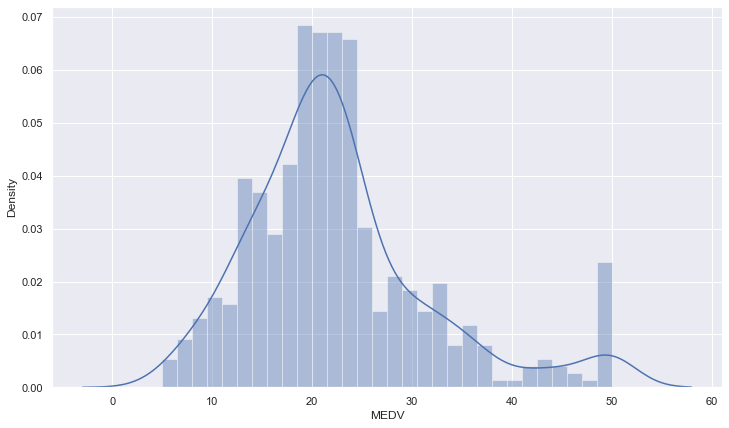

In [13]:
#plot distribution graph for target value 'MEDV'
df = X.copy()
df['MEDV'] = y
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

The response MEDV is normally distributed.

<AxesSubplot:>

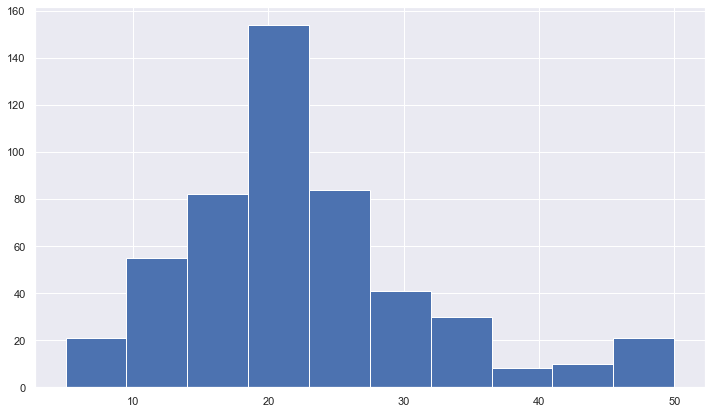

In [14]:
#create Bar chart as the Target variable is Continuous
df['MEDV'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

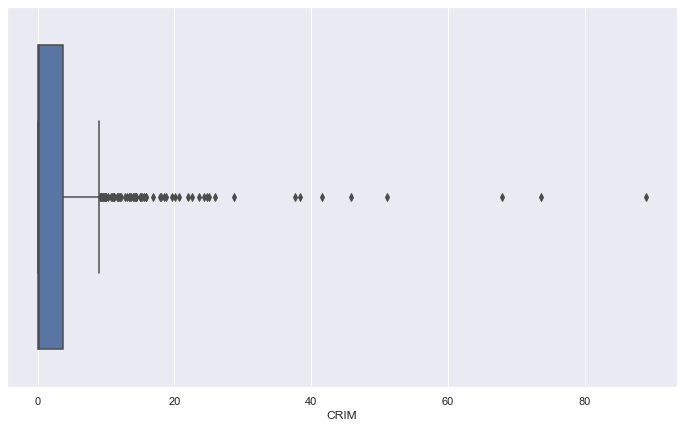

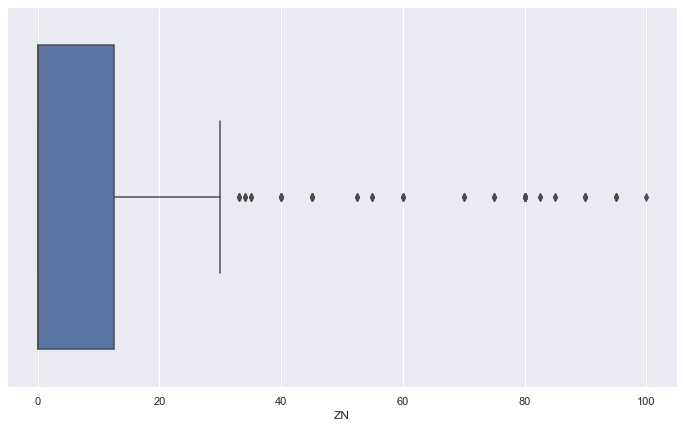

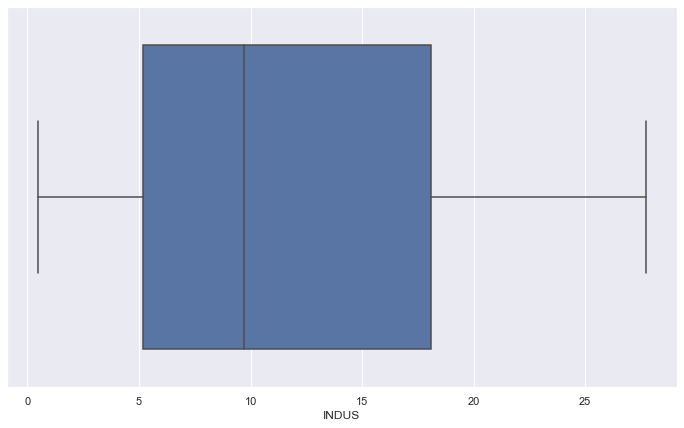

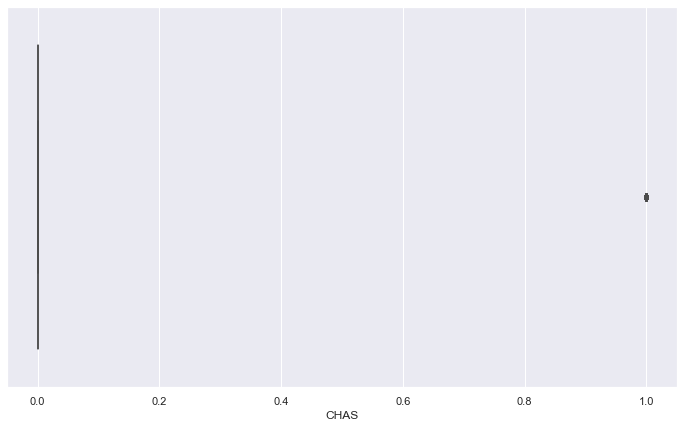

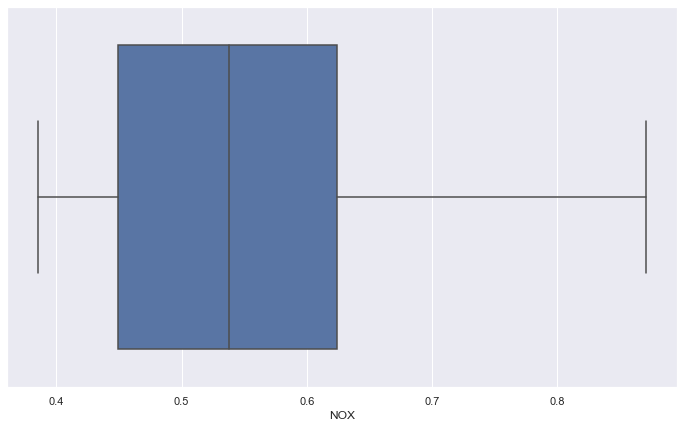

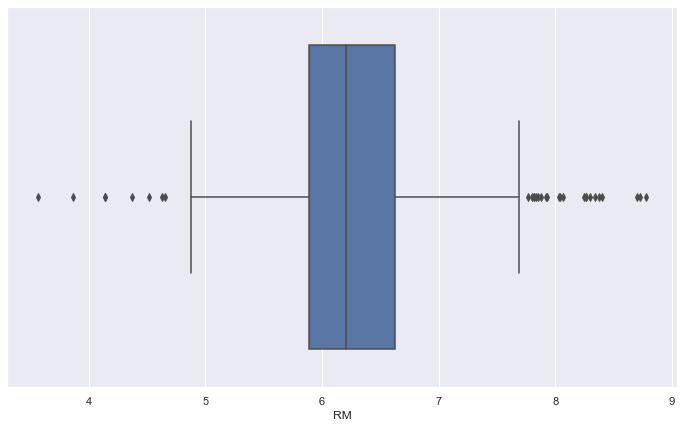

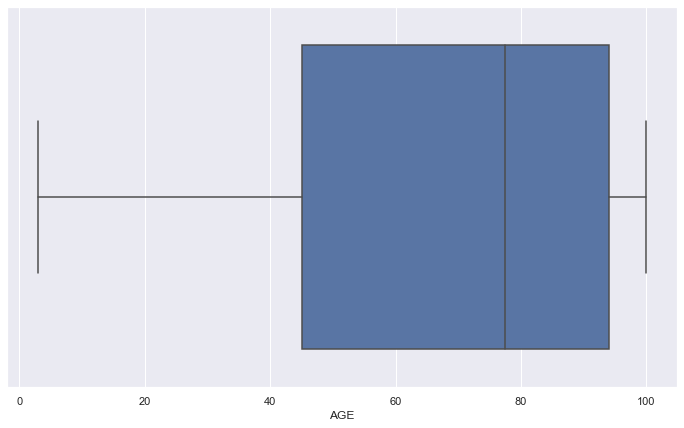

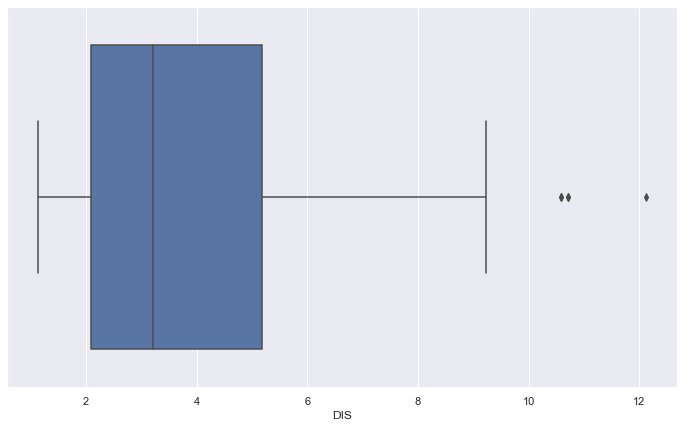

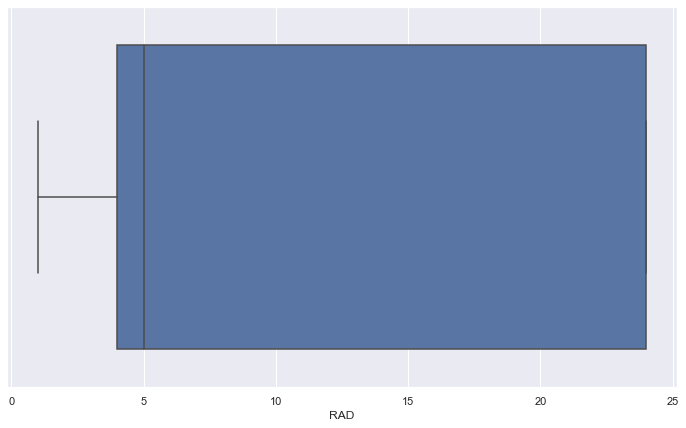

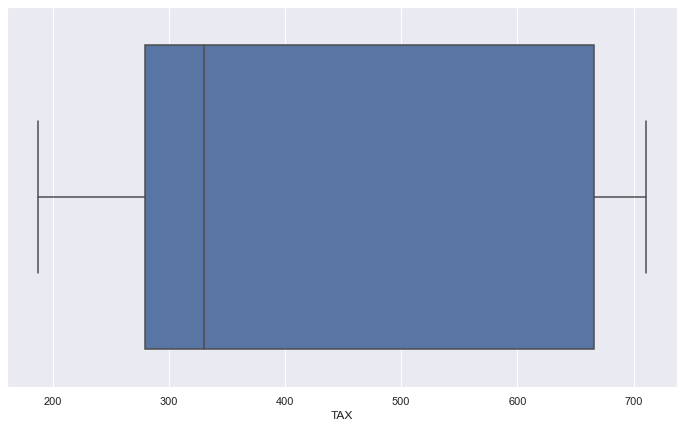

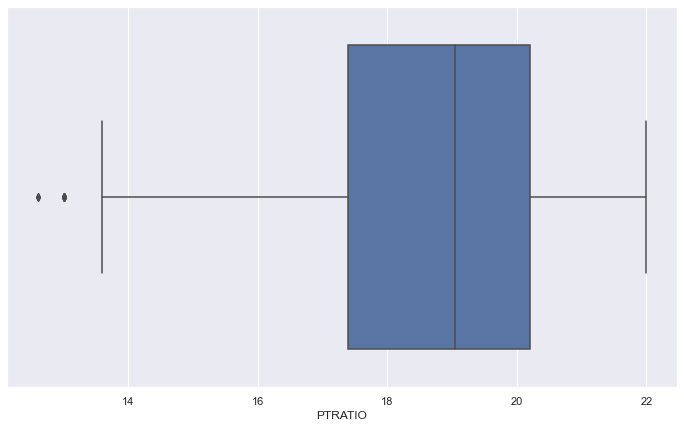

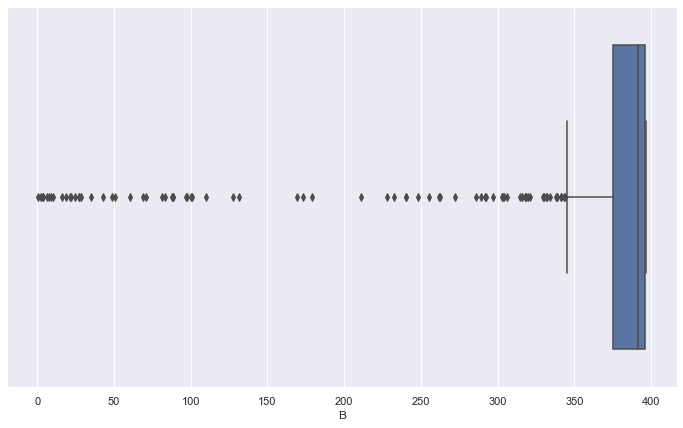

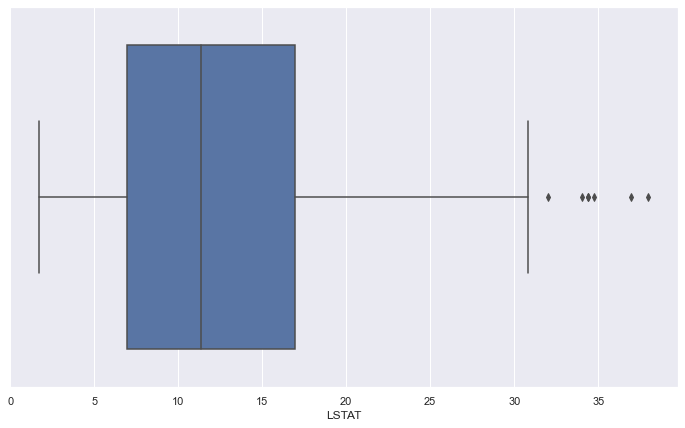

In [15]:
#check  the box plot of the features
for i in X.columns:
    sns.boxplot(X[i],)
    plt.show()

LSTAT, CRIM, ZN, RM, DIS, B have outliers.

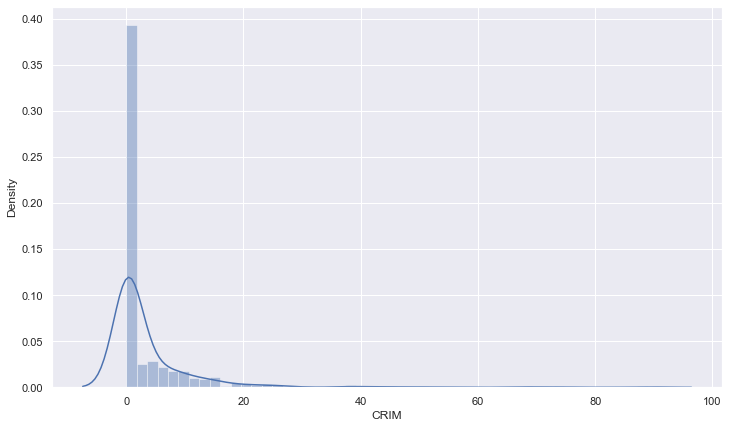

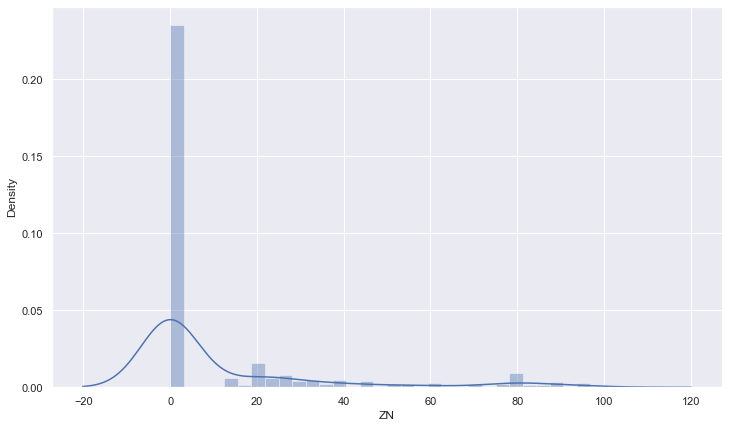

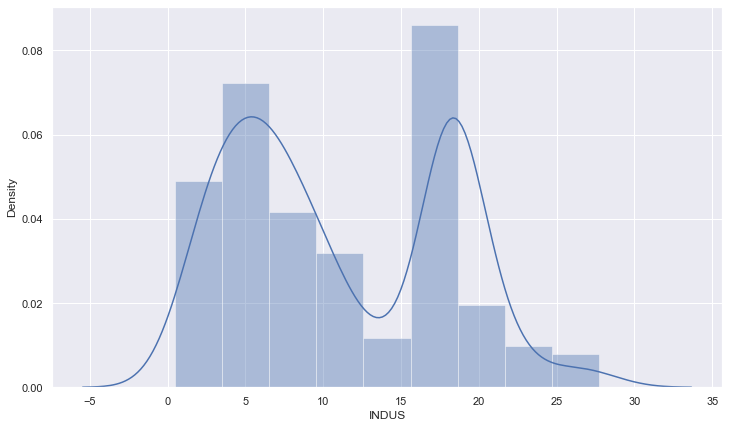

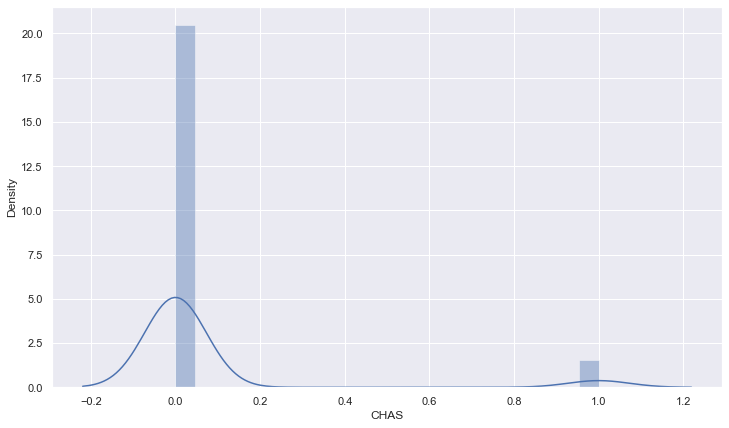

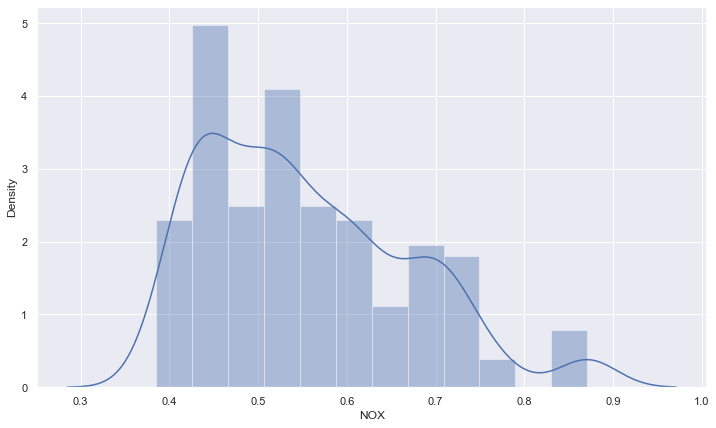

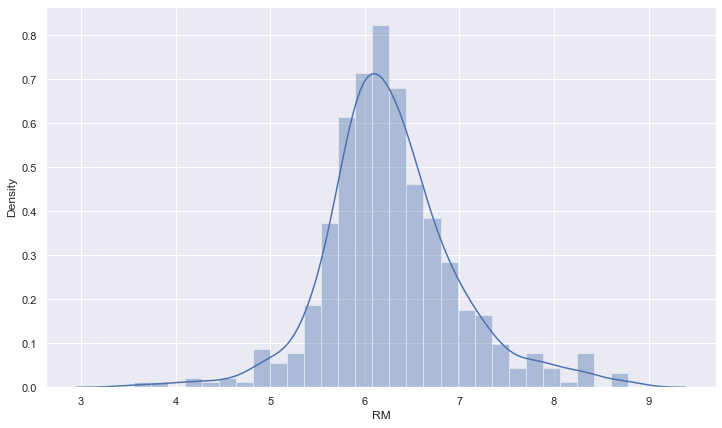

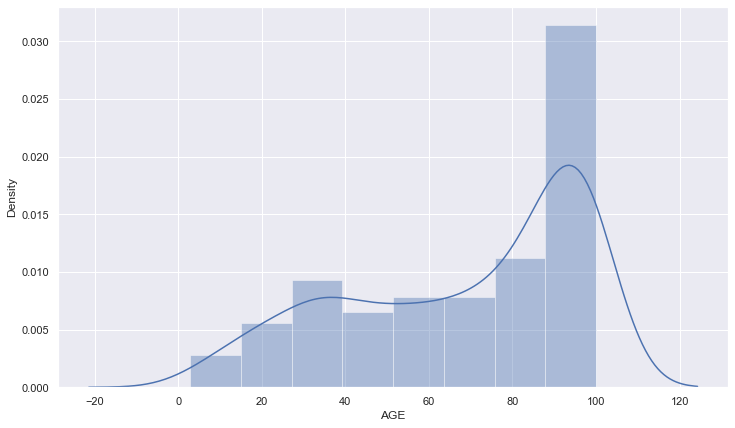

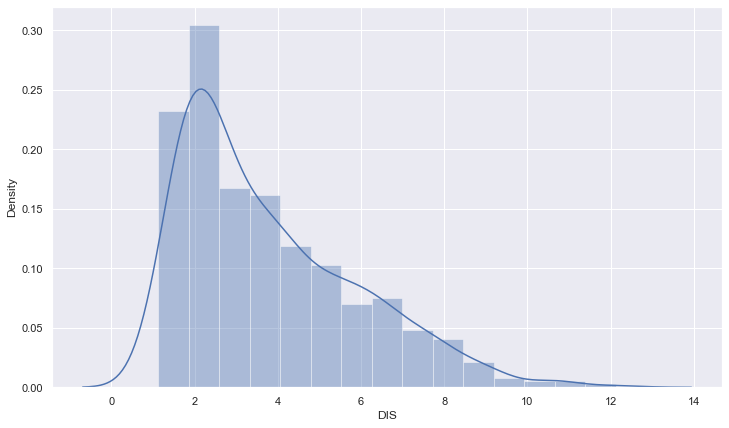

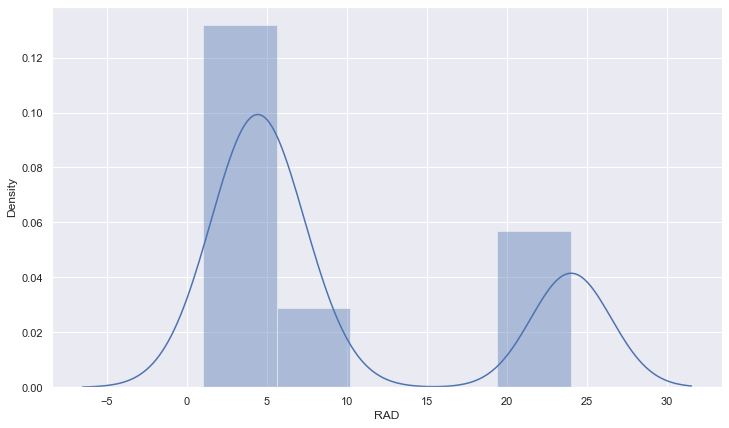

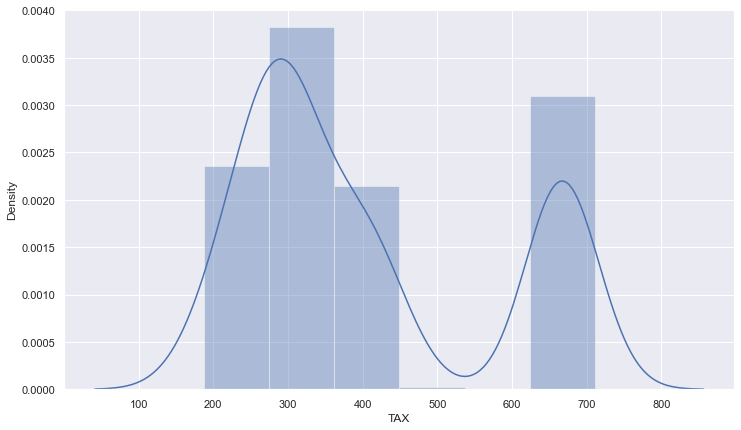

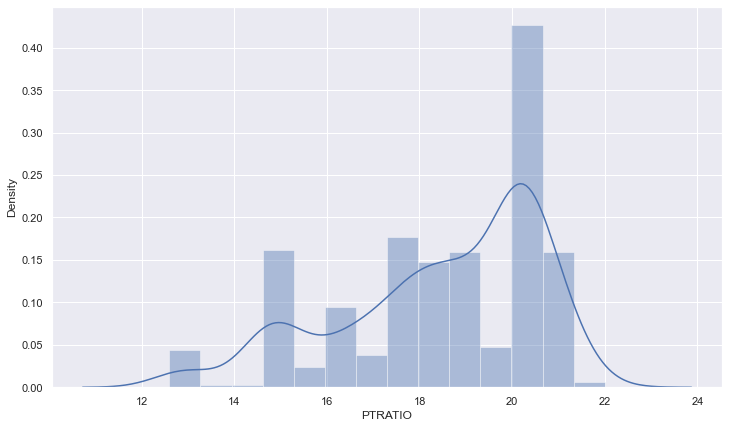

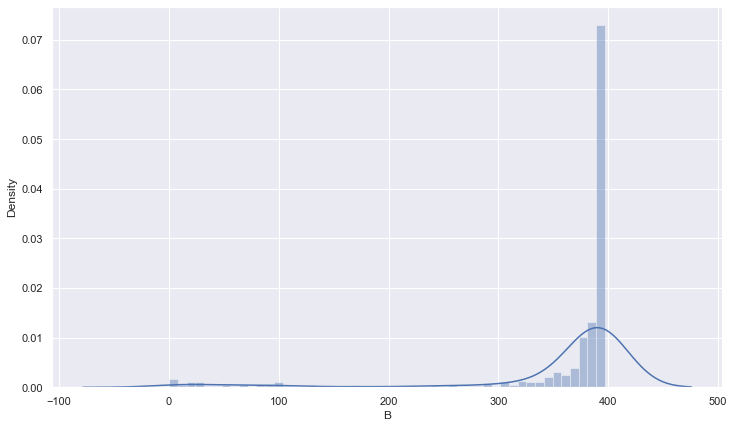

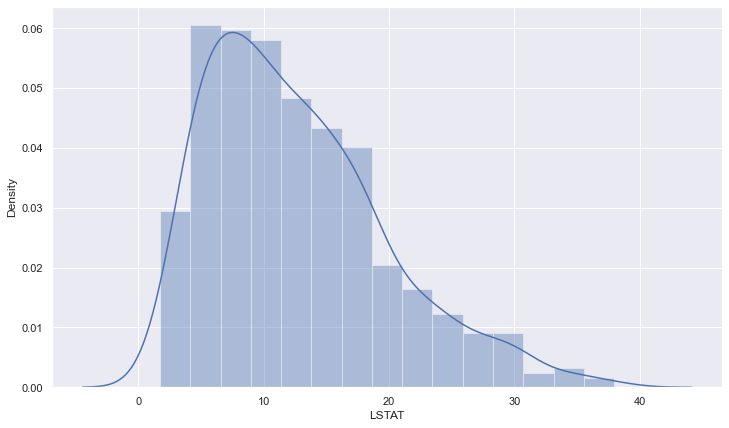

In [16]:
#check  the distribution plot of the features
for i in X.columns:
    sns.distplot(X[i],)
    plt.show()

##### Bi-variate analysis

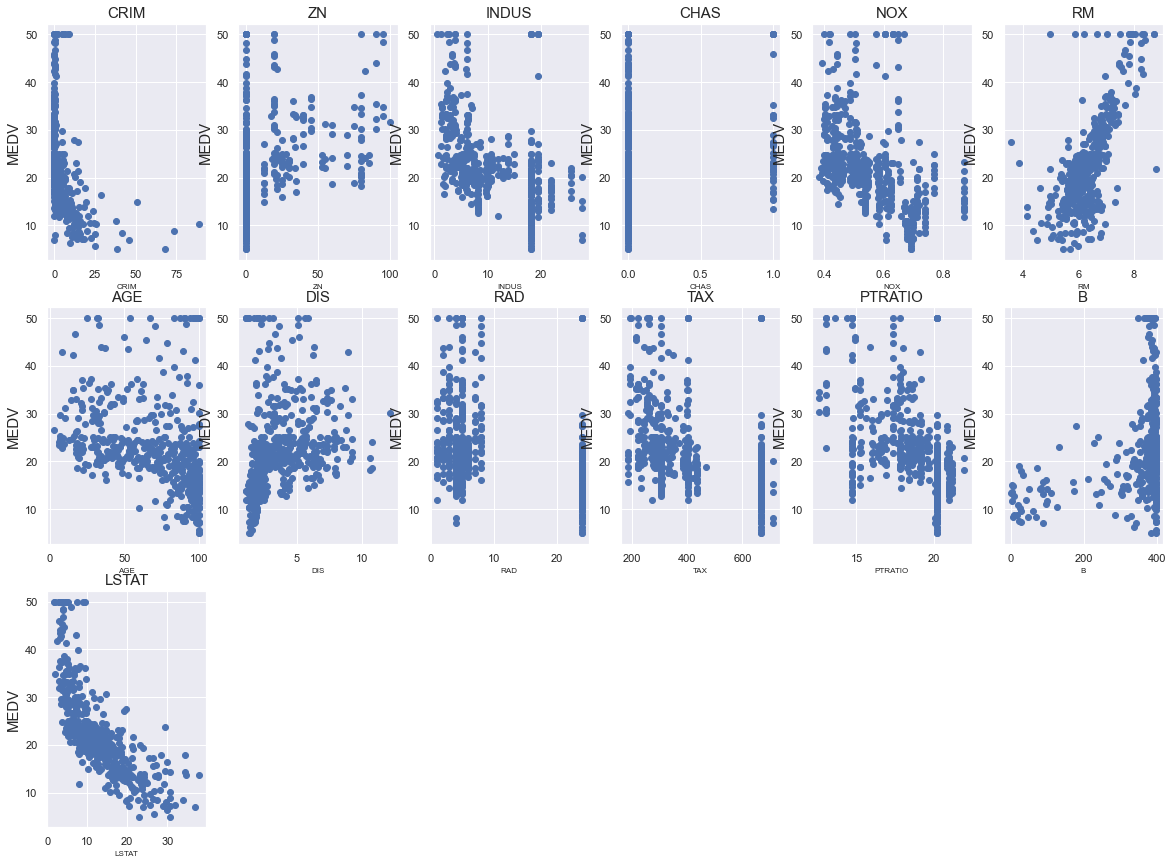

In [17]:
#check the relationship between features and response MEDV 
features = df.drop('MEDV', 1).columns
target = df['MEDV']
plt.figure(figsize=(20,20))
for i, f in enumerate(features):
    # 4 rows of plots,
    #13/3 == 4 plots per row, 
    #i+1 where the plot begins
    plt.subplot(4,len(features)/2, i+1)
    plt.scatter(df[f], target)
    plt.title(f, fontsize=15)
    plt.xlabel(f, fontsize=8) 
    plt.ylabel('MEDV', fontsize=15)

LSTAT and RM look like the only ones that have some sort of linear relationship.  

##### Multi-collinearity handling

In [18]:
# check if there is correlation between the features and response
corr = X.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

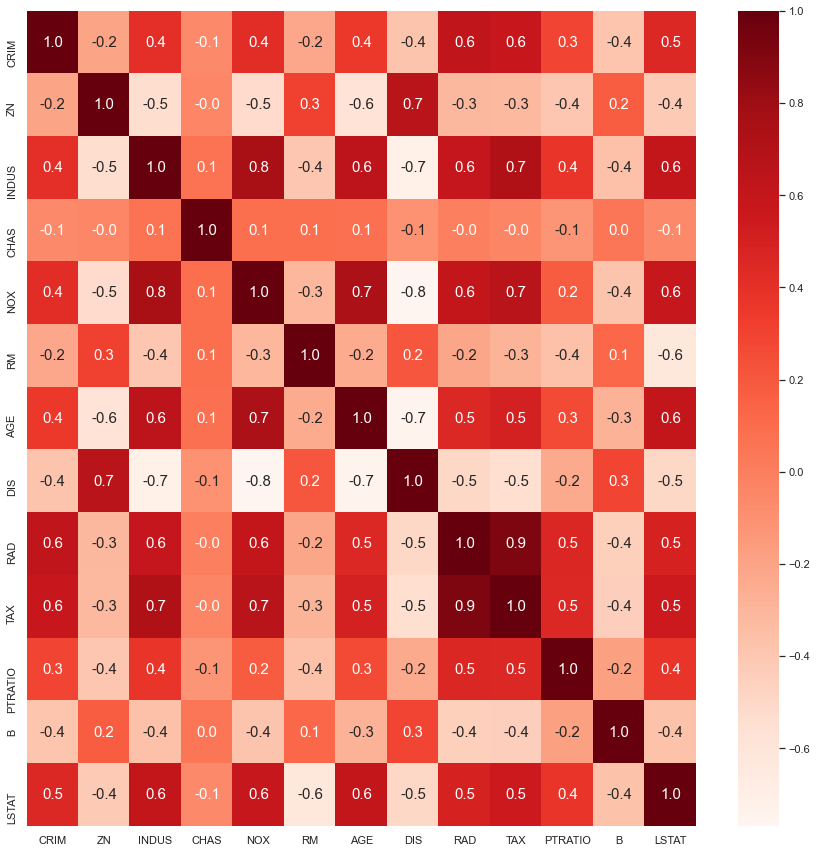

In [19]:
#plot the heatmap of feature correlation 
plt.figure(figsize = (15,15))
sns.heatmap(corr,
           cbar = True,
           fmt = '.1f',
           annot = True,
           annot_kws = {'size':15},
           cmap = 'Reds')

Each square shows the correlation between the variables on each axis(ranging from -1 to +1).

- Values closer to zero means there is no linear trend between the two variables.
- Values close to 1, means the correlation is the more positively correlated; i.e. as one increases so does the other
  and the closer to 1 the stronger this relationship is. 
- A correlation closer to -1 is similar,but instead of both increasing one variable will decrease as the other increases. 

From the heatmap and the corr output, we can see that the


Features RAD and TAX have a correlation of 0.9 or they are closely related to each other. 
NOX and Indus have a hogh correlation of 0.8.
TAX and INDUS also have high correlation of 0.7.

And we can drop one of them from each of these pair of features.. 

Also,  Same goes for the features DIS and AGE, which have a correlation of -0.75.

Also we see that RM has a strong +ve correlation with MEDV(0.7) and LSAT has a high -ve correlation.(-0.75)

For highly multi-collinear dataset, we can calculate the VIF(Variance Inflaction factor) 

VIF is a number that determines whether a variable has multicollinearity or not. That number also represents how much a variable is inflated because of the linear dependence with other variables.

In [20]:
#calculate the VIF for all predictors    
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

vif_info

,VIF,Column
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


Since the VIF value is high for so many features, we will do scaling and PCA to handle the multi-collinearity.

#### Scaling and PCA

In [21]:
##### scale the data
#Standardization scales each input variable separately by subtracting the mean (called centering) and dividing 
#by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


Shape of Data does not changes when rescaling, it just scales the data for all the features.

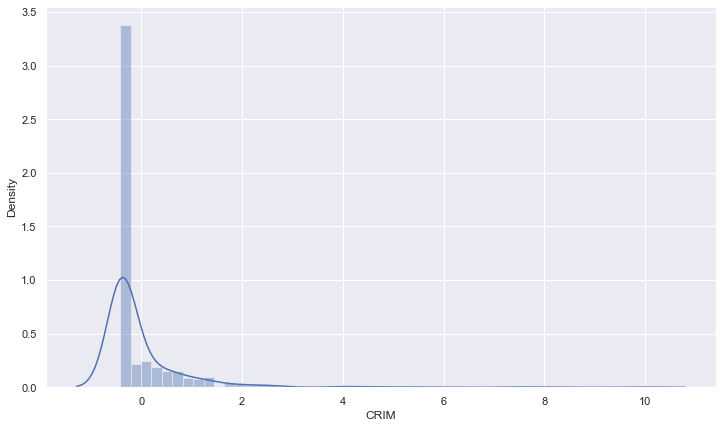

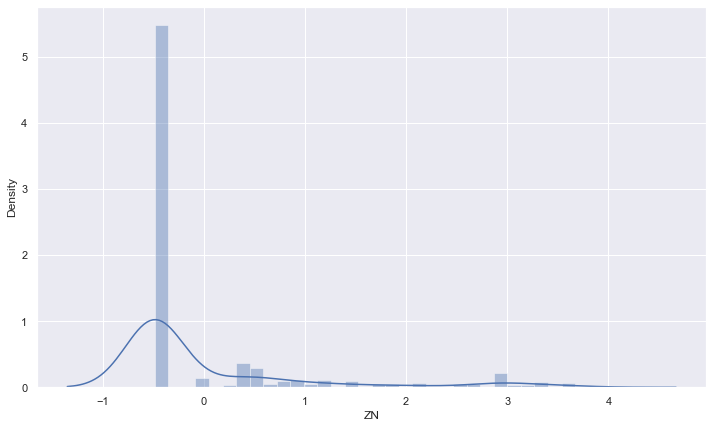

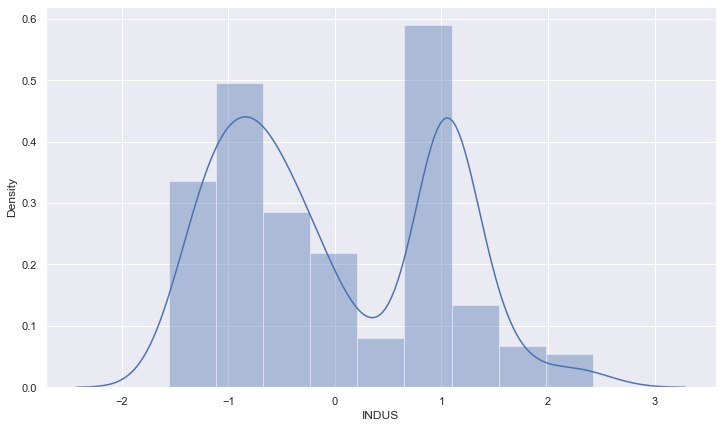

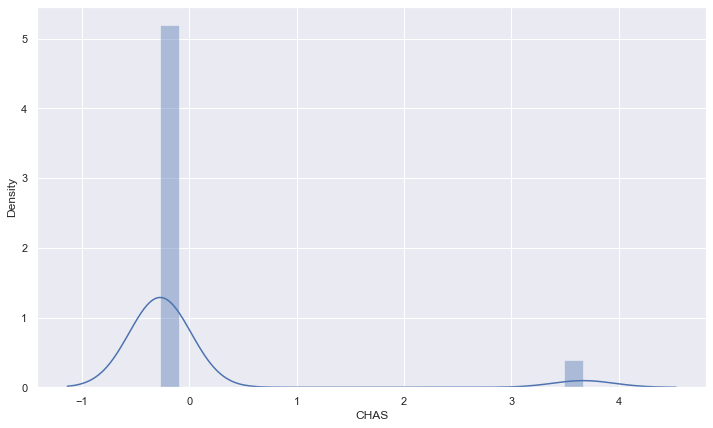

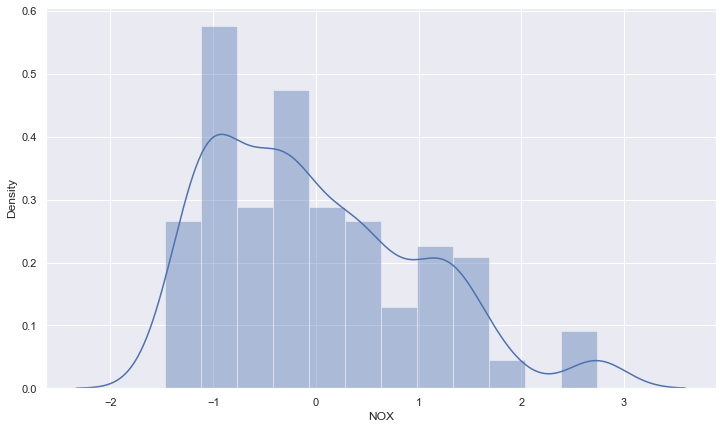

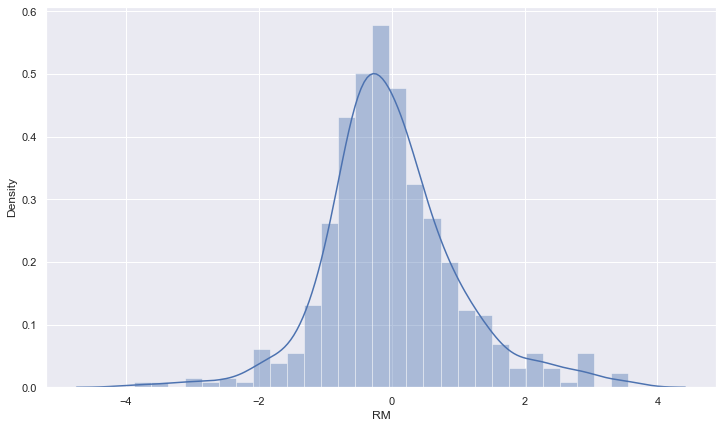

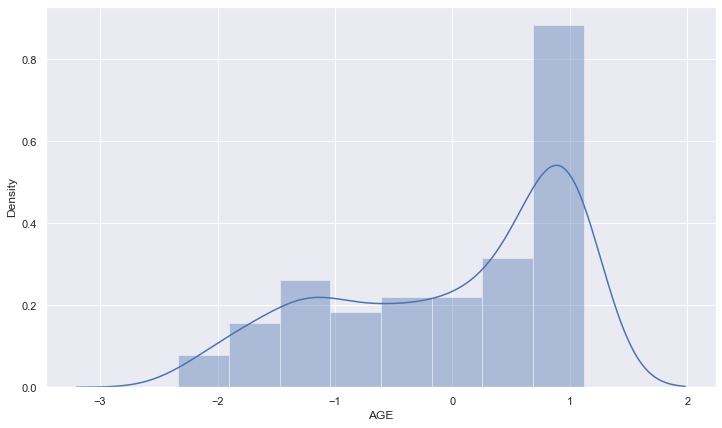

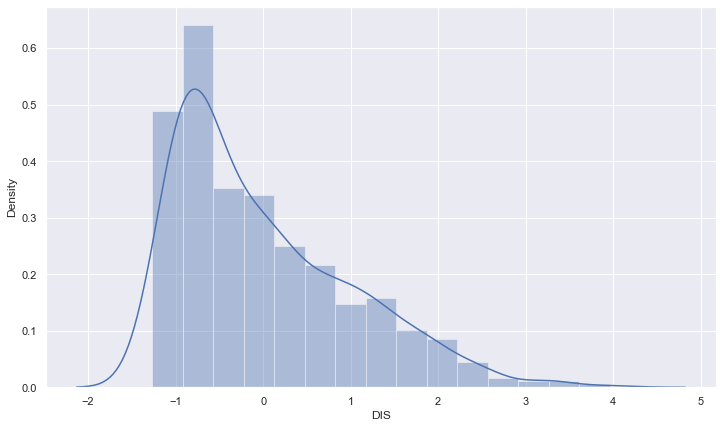

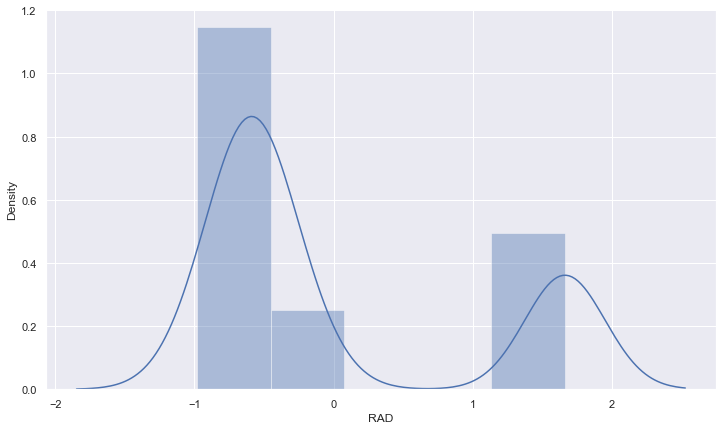

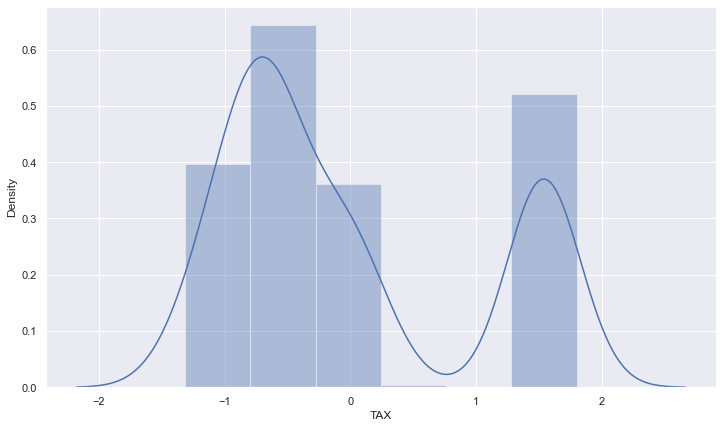

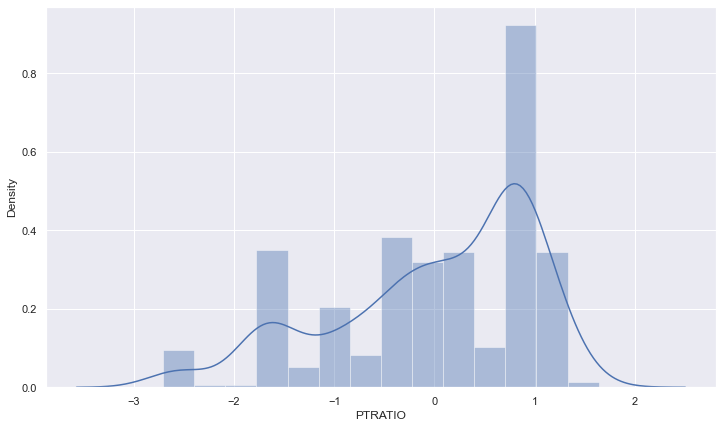

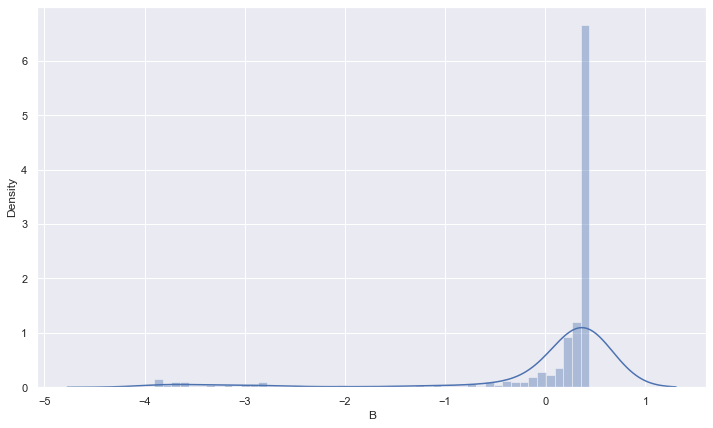

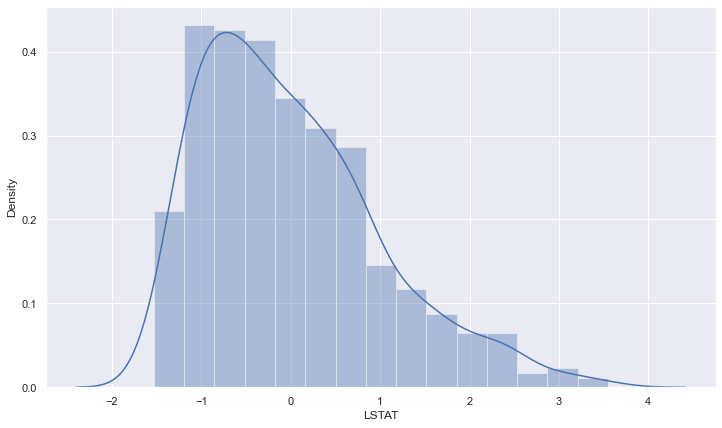

In [22]:
#check  the distribution plot of the features
for i in X_scaled.columns:
    sns.distplot(X_scaled[i])
    plt.show()

The shape did not change after scaling.

##### Principal component analysis (PCA) 

It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

It is often used in dimensionality reduction for reducing complexity of learning models 

In [23]:
# import libraries for PCA
from sklearn.decomposition import PCA

p = PCA(n_components=13)
X_p = p.fit_transform(X_scaled)

X_p = pd.DataFrame(X_p, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
X_p['MEDV'] = y
X_p

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,0.365975,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,-0.070719,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,-0.014022,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209,0.508678,0.007847,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150,0.497732,0.014274,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,-1.121040,0.508064,0.199056,-0.249896,0.877036,0.183086,0.493590,0.450386,0.078978,22.4
502,-0.110513,0.759308,-1.255979,-0.309376,-0.891542,0.408208,0.191779,-0.146502,0.853628,0.631847,0.375688,0.252082,0.037162,20.6
503,-0.312360,1.155246,-0.408598,-0.786304,-1.595185,0.467947,0.294119,-0.638660,0.981032,0.589670,0.115656,0.281964,0.062474,23.9
504,-0.270519,1.041362,-0.585454,-0.678134,-1.416024,0.482259,0.271597,-0.579344,0.936755,0.594610,0.087012,0.301701,0.054370,22.0


<AxesSubplot:>

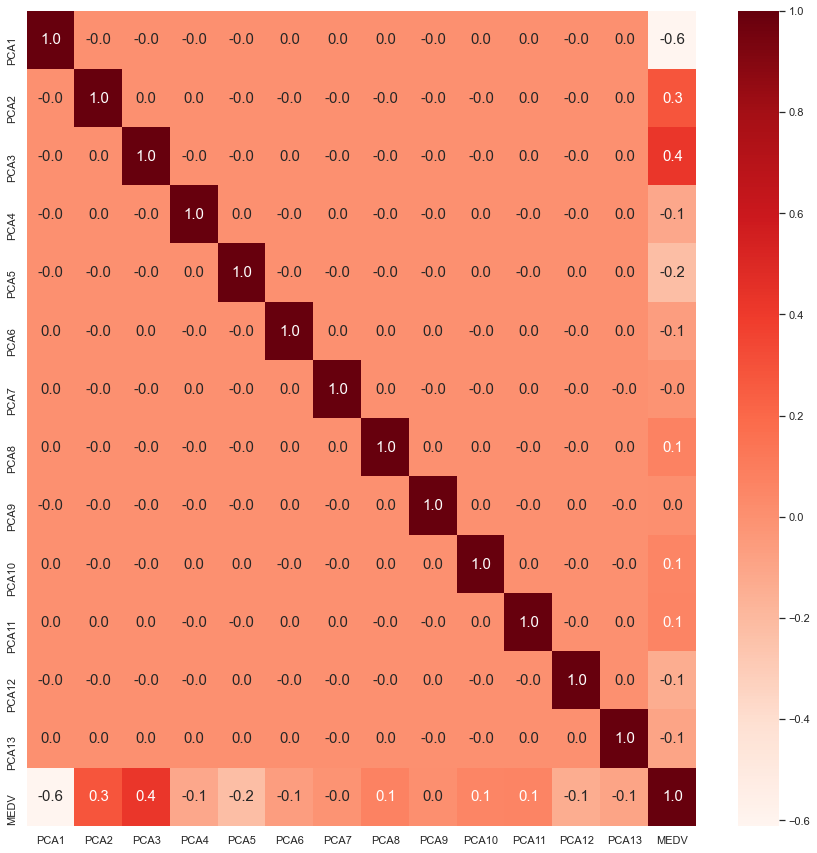

In [24]:
#re-plot the heatmap of feature correlation 
plt.figure(figsize = (15,15))
sns.heatmap(X_p.corr(),
           cbar = True,
           fmt = '.1f',
           annot = True,
           annot_kws = {'size':15},
           cmap = 'Reds')

There is no correlation between predictor variables, thus removing multicollinearity.¶

#### Feature Engineering

As there are no categorical variables, we dont need to do any feature engineering.

### 4. Split into train and test

In [25]:
# import libraires needed to perform our Regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_p,y,test_size=0.2)

In [26]:
#check shape of train 
print(X_train.shape, y_train.shape)

(404, 14) (404, 1)


In [27]:
#check shapoe of test 
print(X_test.shape, y_test.shape)

(102, 14) (102, 1)


### 5. Model Building

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [28]:
#Train the model
from sklearn.linear_model import LinearRegression

#Create a linear regressor 
model = LinearRegression()

#Train the model using the training sets
model.fit(X_train, y_train)


LinearRegression()

In [29]:
#value of coefficients
model.coef_

array([[-4.28585068e-16, -1.28674567e-15,  6.54265413e-16,
         1.34913527e-16, -7.93550738e-16,  2.07549242e-18,
         4.90522614e-16,  6.27787571e-16,  2.85207318e-16,
        -8.16331987e-16, -2.69102466e-16,  4.63406020e-16,
         2.02117433e-16,  1.00000000e+00]])

In [30]:
#value of y-intercept 
model.intercept_

array([-1.0658141e-14])

In [31]:
#make predictions on train data
y_pred = model.predict(X_test)


### 6. Model Evaluation

We will evaluate our model using several metrtics - R-Squared, Adjusted R-Squared, MAE, MSE and RMSE. 

In [32]:
#model evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

#r-squared
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

5.391114041279775e-15

The RMSE is the square root of the variance of the residuals. Lower values of RMSE indicate better fit.

RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. Lower values of RMSE indicate better fit.

The RMSE for our linear model is 1.417925441640537e-14.

In [33]:
r2_score(y_test,y_pred)

1.0

𝑅-squared : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. Higher the value, better is the model performance.

Here 100% of the variation can be explained by our fitted linear regression model.

In [34]:
#mean absolute error 
metrics.mean_absolute_error(y_test,y_pred)

3.970679993953501e-15

MAE is the mean of the absolute value of the errors. MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. Lower values are better. 

Here the value is 1.1406997351050628e-14, which is extremely low.

In [35]:
#mean squared error
metrics.mean_squared_error(y_test,y_pred)

2.9064110606083945e-29

The mean square error (MSE) is the the average squared difference between the estimated values and what is estimated.¶
There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.

Here the MSE is 2.0105125580515121e-28, which is very low.

### 7. Residual Analysis


We can validate our model by defining and examining residual plots.

The difference between the observed value of the dependent variable and the predicted value is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

If we take a look at the generated ‘Residual errors’ plot, we can clearly see that the train data plot pattern is non-random. Same is the case with the test data plot pattern. So, it suggests the dataset is a better-fit for a non-linear model.

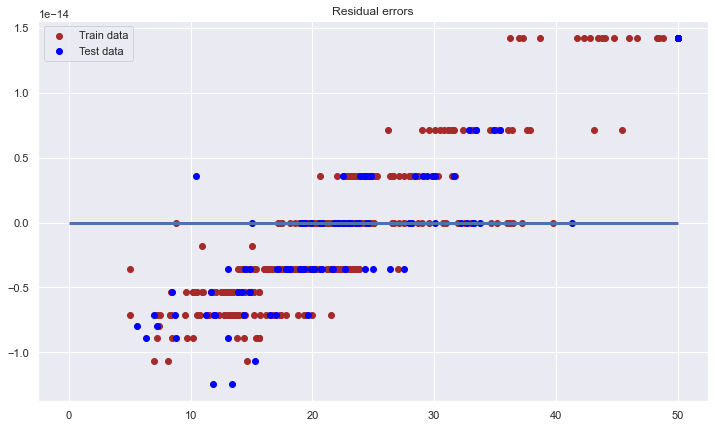

In [36]:
# Checking residuals
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color = 'brown', label = 'Train data')
plt.scatter(model.predict(X_test), y_pred - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 2)
plt.show()

There is no pattern visible in this plot and values are Not distributed equally around zero. So Linearity assumption is not satisfied.

### 8. Hyper parameter Tuning

For basic straight line linear regression, there are no hyperparameter.

### 9. Conclusion


From the root mean squared error, we can interpret that on average we are "1.417925441640537e-14" dollars off the actual value of a house price, which is a very good prediction value.

With an R-squared value of approxiately 100%, the model is clearly over-fitting. And it is not a good fit for the dataset. We can improve the model by using a bigger dataset for model training, removing outliers, log transforming of features or response or applying other variable selection methods like Lasso, Ridge or Elasticnet. We could also try to use polynomial regression.
